In [4]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(32)
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import pickle

# Diabetes dataset - EDA
### This dataset contains health and demographic data of 100000 individuals pertinent to diabetes research.

Link to the [dataset](https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows).

## Business goal:
In this project we decided to make a machine learning model which will **predict whether a person is at risk of having diabetes or not**. It may contribute to medical research and assist healthcare professionals in early diagnosis, allowing for timely intervention and lifestyle modifications.

## Performance metrics:
Because it's more damaging to miss an existing diabetes than to detect not present diabetes, we are going to use **AUC-ROC, confusion matrix** and **recall** to measure the success of our predictions.

In [5]:
data_raw = pd.read_csv("diabetes_dataset_with_notes.csv")

In [6]:
data_raw.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [7]:
len(data_raw)

100000

## Columns:
year - we assume that it's the year the data was collected

gender

age

location

race: AfricanAmerican, Asian, Caucasian, Hispanic, Other

hypertension - has binary values where 1 means the disease is present

heart_disease - has binary values where 1 means the disease is present

smoking_history - categorical column

bmi - body mass index, norms: 18.5-24.9

hbA1c_level - average blood glucose (sugar) levels for the last two to three months, if diabetes is not well controlled, blood glucose levels will be high causing higher HbA1c results. Norms for adults: below 5.7%

blood_glucose_level - norms according to WHO: 70mg/dL - 100mg/dL

**diabetes - target variable, has binary values where 1 means the disease is present**

clinical_notes - text information about the patient's health

There are no missing values in the dataset.

In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

We chose a target variable - diabetes and extracted it from the dataset

In [9]:
y = np.array(data_raw["diabetes"])
X = data_raw.drop(["diabetes"], axis=1)
X.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,"Healthy BMI range. High HbA1c level, indicativ..."


We split the dataset into 3 parts: train(70%*70%), validate(30%), test(30%*70%)  


In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.3, random_state=42
)

df_train = pd.concat([X_train, pd.DataFrame(y_train, index=X_train.index, columns=['diabetes'])], axis=1)
df_test= pd.concat([X_test, pd.DataFrame(y_test, index=X_test.index, columns=['diabetes'])], axis=1)
df_val = pd.concat([X_val, pd.DataFrame(y_val, index=X_val.index, columns=['diabetes'])], axis=1)

In [11]:
with open("train.pkl", "wb") as f:
    pickle.dump((X_train, y_train), f)
with open("test.pkl", "wb") as f:
    pickle.dump((X_test, y_test), f)
with open("validate.pkl", "wb") as f:
    pickle.dump((X_val, y_val), f)    

In [12]:
X_train.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'clinical_notes'],
      dtype='object')

We changed the types of some columns (year).

In [13]:
df_train['year'] = pd.to_datetime(X_train['year'], format='%Y')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49000 entries, 24942 to 82844
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  49000 non-null  datetime64[ns]
 1   gender                49000 non-null  object        
 2   age                   49000 non-null  float64       
 3   location              49000 non-null  object        
 4   race:AfricanAmerican  49000 non-null  int64         
 5   race:Asian            49000 non-null  int64         
 6   race:Caucasian        49000 non-null  int64         
 7   race:Hispanic         49000 non-null  int64         
 8   race:Other            49000 non-null  int64         
 9   hypertension          49000 non-null  int64         
 10  heart_disease         49000 non-null  int64         
 11  smoking_history       49000 non-null  object        
 12  bmi                   49000 non-null  float64       
 13  hbA1c_level      

As it can be seen, there are 6 different categories in the smoking_history column. Former and not current can have the same meaning, which means that they could be merged into one category. 'Ever' could mean 'former', 'current' or 'not current', but because we don't know which, for now we decided to leave it as it is. 'No info' might be problematic and they make the majority of our data.

In [15]:
X_train['smoking_history'].value_counts()

smoking_history
No Info        17610
never          17219
current         4543
former          4526
not current     3189
ever            1913
Name: count, dtype: int64

In [16]:
X_train['gender'].value_counts()

gender
Female    28658
Male      20332
Other        10
Name: count, dtype: int64

In [17]:
X_train['location'].value_counts()

location
Massachusetts           1049
Nevada                  1043
North Dakota            1042
Mississippi             1038
Kansas                  1037
Maine                   1035
Connecticut             1032
Arkansas                1025
Maryland                1025
Kentucky                1023
Nebraska                1021
Georgia                 1019
North Carolina          1019
Iowa                    1015
Pennsylvania            1011
Louisiana               1010
Michigan                1006
California               998
New Hampshire            998
Minnesota                997
Illinois                 994
District of Columbia     992
Idaho                    990
Oregon                   985
Missouri                 984
Hawaii                   984
Alabama                  982
New Mexico               981
Alaska                   980
Delaware                 980
Oklahoma                 978
Montana                  977
Rhode Island             964
New York                 963
South

There are 55 different locations.

In [18]:
len(X_train['location'].value_counts())

55

### Some quick observations:
- The vast majority of respondents (91.5%) don't have diabetes.
  This means that our data is **not balanced** which can result in ignoring low-frequency category. That's why we will consider using **balancing strategies**, for example oversamling, undersampling, SMOTE.  
  Also we may use **cross-validation**. Because of that we won't standardize or normalize our data at this stage. It will be done in the next milestone.
- Mean age is 42 years.  
- The percentage share of all races is quite equal, around 20%.  
- Average bmi is 27.36 which is in the overweight range.  
- Similarly, averange blood glucose level is above the norm, but hbA1c levels fit the norms.  
- Around 4% of the subjects have heart disease and around 7.4% suffer from hypertension.  

In [19]:
df_train.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,49000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000
mean,2018-05-13 16:28:13.322448896,41.823485,0.200000,0.199388,0.198796,0.200857,0.200959,0.074184,0.039224,27.355888,5.528969,137.935714,0.085000
min,2015-01-01 00:00:00,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019-01-01 00:00:00,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.680000,4.800000,100.000000,0.000000
50%,2019-01-01 00:00:00,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019-01-01 00:00:00,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.630000,6.200000,159.000000,0.000000
max,2022-01-01 00:00:00,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.220000,9.000000,300.000000,1.000000
std,NaN,22.480037,0.400004,0.399544,0.399098,0.400646,0.400722,0.262072,0.194131,6.633497,1.066621,40.778085,0.278885


We started with some histograms showing the distribution of the features. 

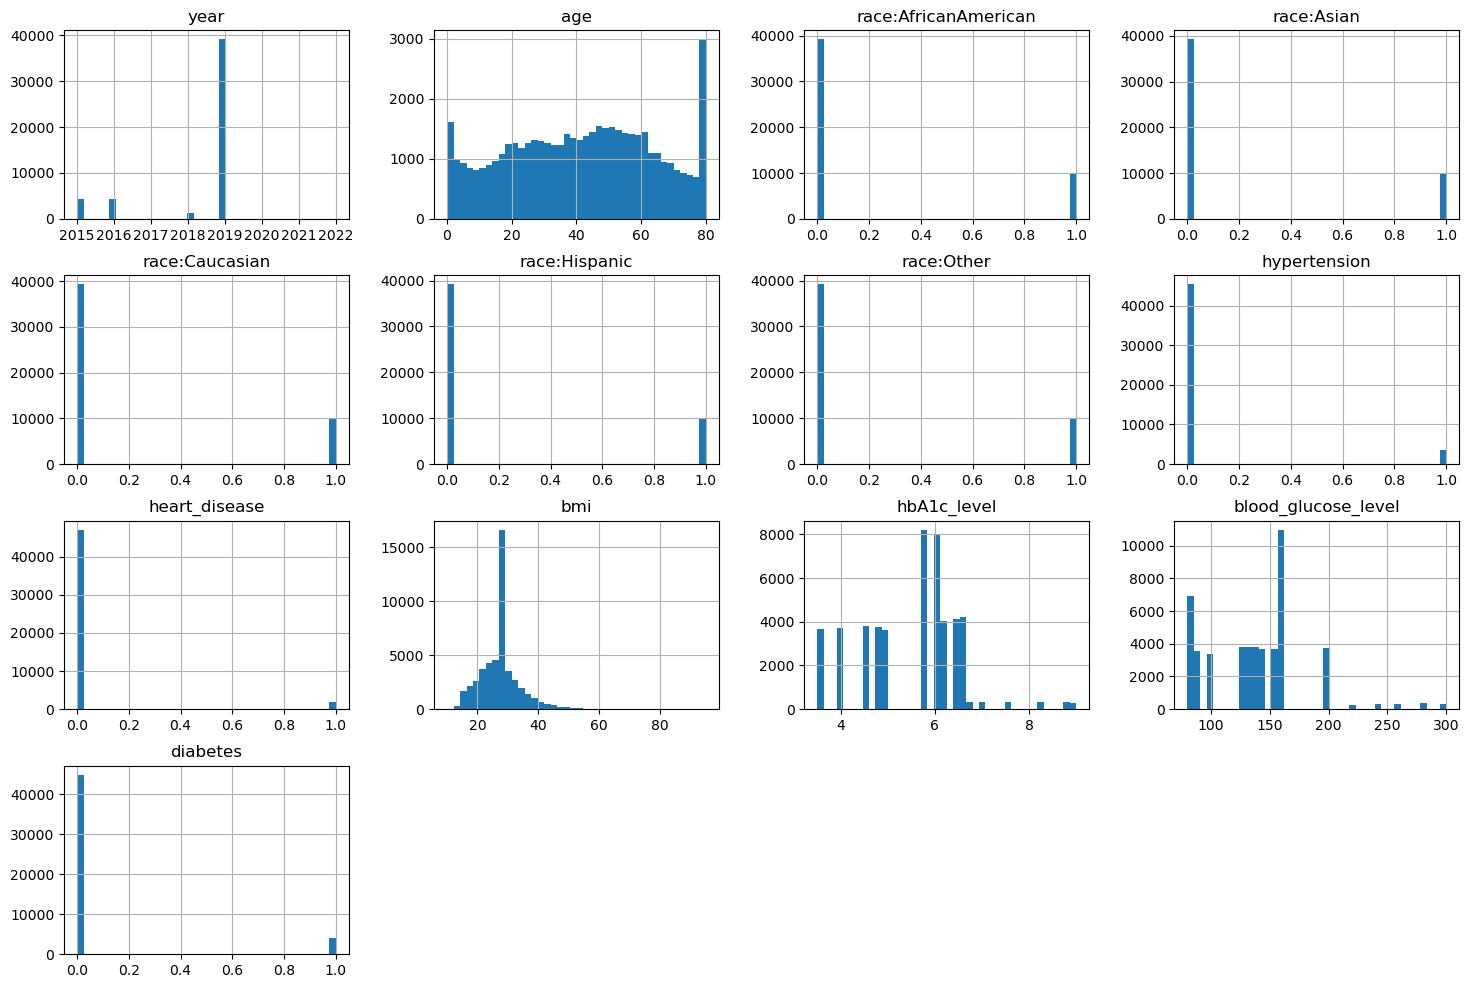

In [20]:
df_train.hist(bins=40, figsize=(18,12))

plt.show()

We checked the bmi distribution and came to the conclusion that we don't want to remove the outliers, because they can be useful. Moreover, there are children in our dataset and for them bmi results can be inaccurate. We should take that into consideration when creating our model using bmi.

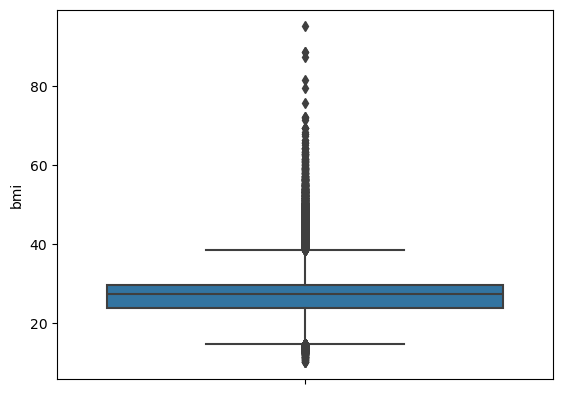

In [21]:
sns.boxplot(y=df_train['bmi'])
plt.show()

We saw that the age has a weird distribution. When changing the number of bins the shape was different. So we decided to make a seprate histplot for age with number of bins = max of age.
There are more middle aged people. Apart from that the biggest number of people are aged 80 and 1. It can be caused by examining many newborns and labeling poeple older than 80 as 80.

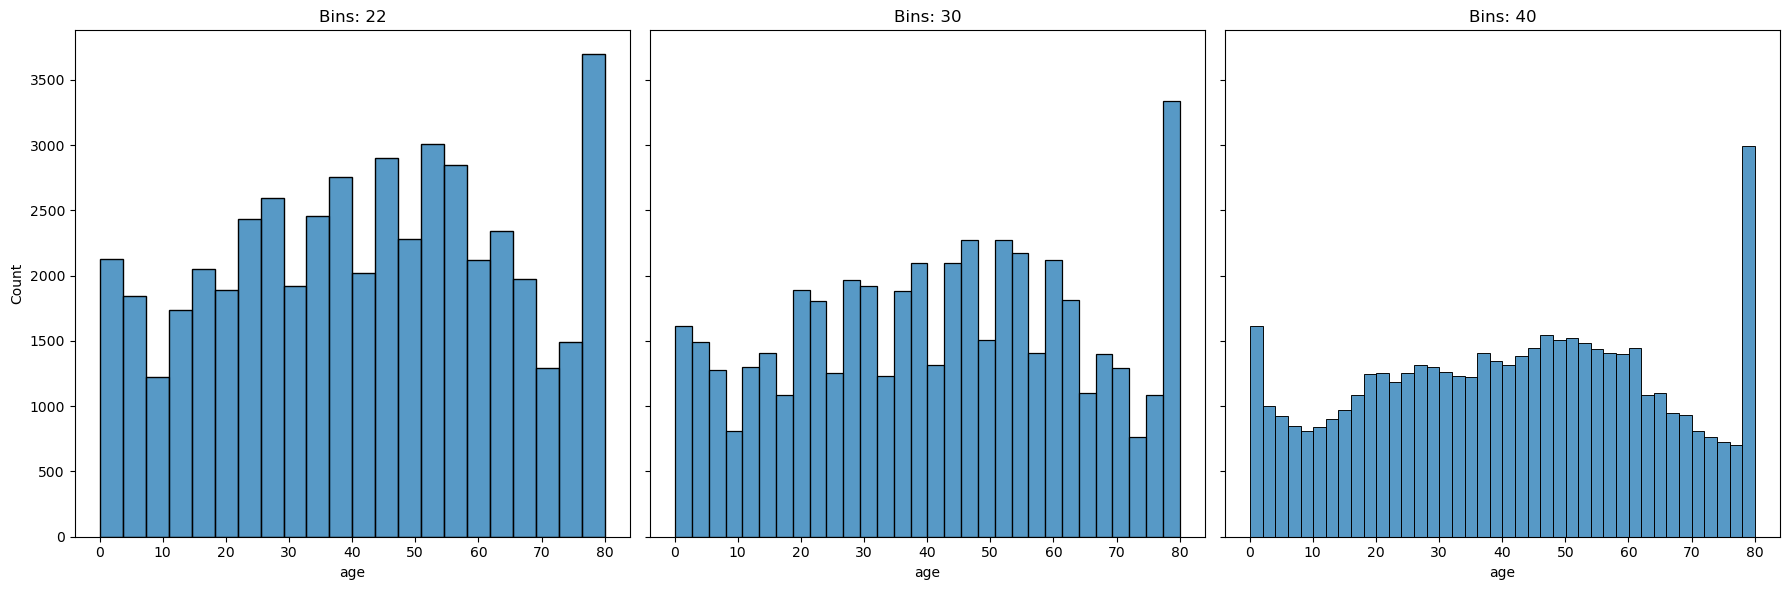

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True) 

bins_list = [22, 30, 40] 

for i, bins in enumerate(bins_list):
    sns.histplot(x=df_train['age'], bins=bins, ax=axes[i])
    axes[i].set_title(f'Bins: {bins}')
plt.tight_layout()
plt.show()

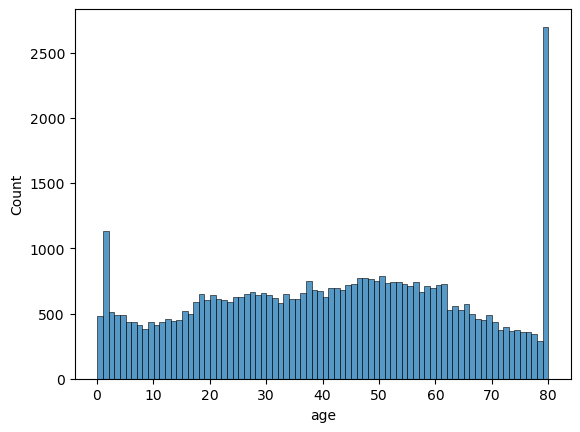

In [23]:
sns.histplot(x=df_train['age'], bins=max(df_train['age'].astype(int)))
plt.show()

There is a relationship between all the features presented below and diabetes. People with diabetes tend to have higher values of these features.

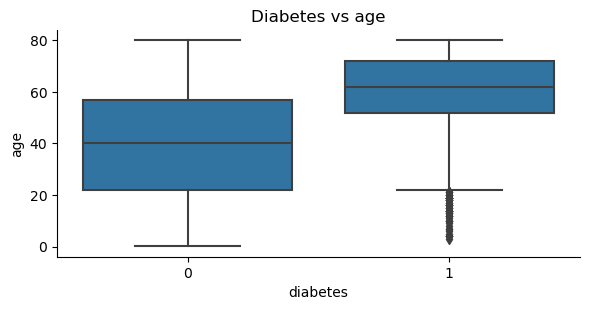

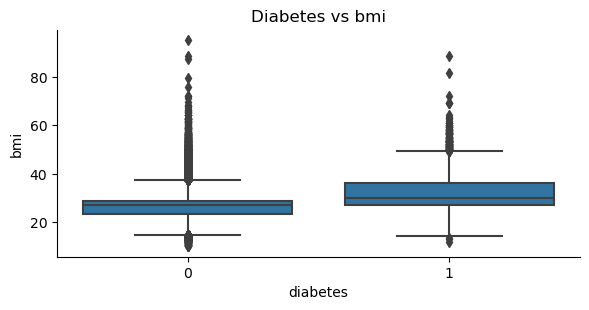

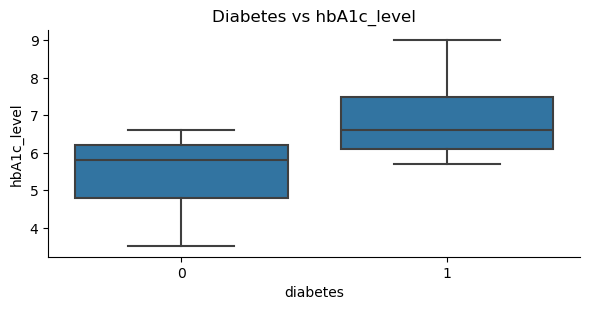

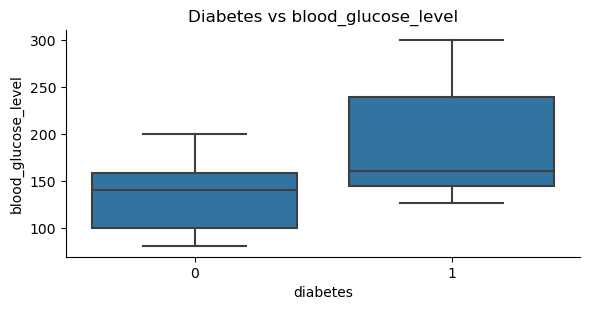

In [24]:
for col in ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']:
    g=sns.FacetGrid(df_train, aspect=2)
    g.map(sns.boxplot, 'diabetes', col)
    plt.title(f"Diabetes vs {col}")
plt.show()

We checked the correlations betweens some numeric features.

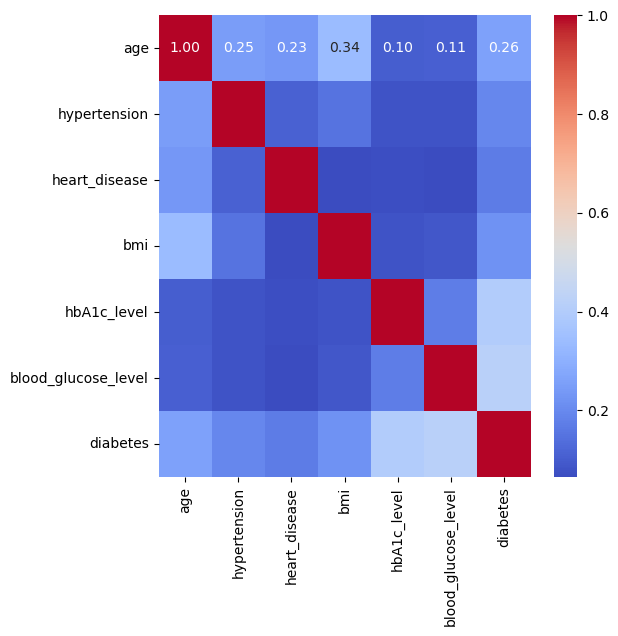

In [25]:
races=[col for col in df_train.columns if col.startswith('race')]
df_num = df_train.drop(columns=["year", "gender", "location", "smoking_history", "clinical_notes"] + races)
plt.figure(figsize=(6, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

We were surpised that the correlation between hbA1C_level and blood_glucose_level was low. After some research, in [this article](https://academic.oup.com/jcem/article/104/3/707/5183246)
we found out that there is a strong correlation (around 0.8) when a person is diabetic, but not as strong otherwise. We could use that information later to bulid our model.
HbA1c_level and blood_glucose_level have a similar correlation with diabetes - it's the highest from all of the presented features.  
Age has the third highest correlation with diabetes, but only around 0.3.

To check the relationship between diabetes and gender, race, smoking history we made plots presenting the percentage of people with diabetes divided into different categories.

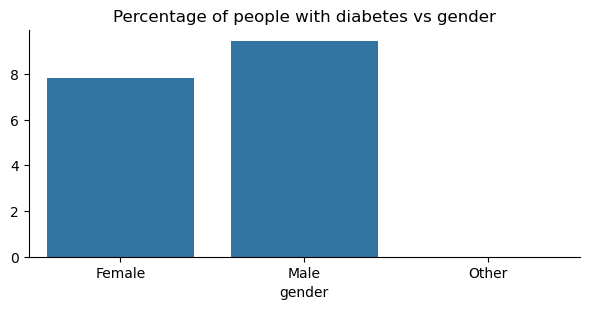

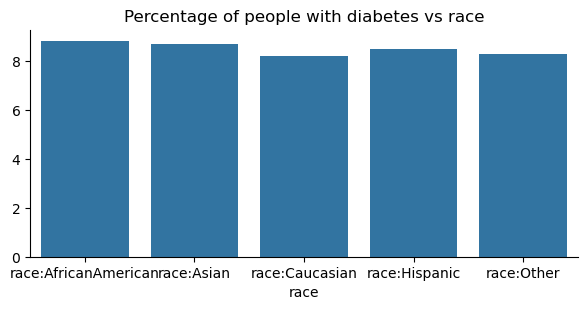

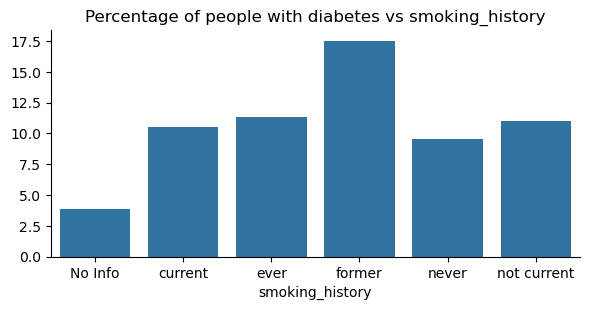

In [26]:
df_train_copy=df_train
df_train_copy["race"]=df_train_copy[races].idxmax(axis=1)
for cat in ["gender", "race", "smoking_history"]:
    h=sns.FacetGrid(df_train_copy, aspect=2)
    category=df_train_copy.groupby(cat)["diabetes"].mean()*100
    h.map(sns.barplot,x=category.index, y=category.values)
    plt.title(f"Percentage of people with diabetes vs {cat}")
plt.show()

**Some observations**
- Slightly more males tend to have diabetes
- Race seems to have no impact on diabetes
- Different smoking histories have different percentage of diabetic people, former has the highest percentage.

From that we can conclude that gender and smoking history might help predict diabetes, but race could be deleted.

We wanted to calulate the correlation between gender and diabetes, smoking_history and diabetes using Cramer’s V (a measure of the strength of association between two nominal variables). It turned out that the correlation is low (0 - meaning no correlation and 1 - full correlation).

In [27]:
def cramers_v(cat_var, bin_var):
    table = pd.crosstab(cat_var, bin_var)
    chi2, p, dof, expected = chi2_contingency(table)
    n = table.sum().sum()
    min_dim = min(table.shape) - 1
    cramers_v_score = np.sqrt(chi2 / (n * min_dim))
    return cramers_v_score
    
cramers_v_score = cramers_v(df_train["gender"], df_train["diabetes"])
print("gender: ", cramers_v_score)
cramers_v_score = cramers_v(df_train["smoking_history"], df_train["diabetes"])
print("smoking_history: ", cramers_v_score)
cramers_v_score = cramers_v(df_train["hypertension"], df_train["diabetes"])
print("hypertension: ", cramers_v_score)
cramers_v_score = cramers_v(df_train["heart_disease"], df_train["diabetes"])
print("heart_disease: ", cramers_v_score)
cramers_v_score = cramers_v(df_train["location"], df_train["diabetes"])
print("location: ", cramers_v_score)

gender:  0.029058439602534777
smoking_history:  0.14656342548079862
hypertension:  0.1928176259957751
heart_disease:  0.16854974732922753
location:  0.035507286547294396


We dived into "clinal_notes" feature. It is a text column. To analyse it, we spilt it into fragments and counted the observations. The results are promising. There are only 26 different text fragments. Some of them seem not carry additional information, for example "High HbA1c level" or "Young patient". But for instance "potential diabetes concern" might be useful for our model.

In [28]:
notes = {}
def split_and_count(x, notes):
    x = x.replace('.', ',')
    cat_list = x.split(',')
    for cat in cat_list:
        notes.setdefault(cat, 0)
        notes[cat] += 1
    return notes

In [29]:
for index, value in df_train['clinical_notes'].items():
    split_and_count(value, notes)

In [30]:
notes_df = pd.DataFrame.from_dict(notes, orient='index').reset_index()
notes_df.columns = ['info', 'count']
notes_df.sort_values(by='count', ascending=False).reset_index()

,index,info,count
0,8,,49000
1,5,History of smoking,31781
2,6,potential lung and vascular health impact,31781
3,3,Elevated blood glucose levels,31338
4,4,potential diabetes concern,31338
5,16,advised dietary and exercise modifications,22498
6,0,Young patient,12685
7,1,generally lower risk but needs lifestyle asse...,12685
8,15,Overweight,12256
9,12,increased risk for diabetes and cardiovascula...,11618


Coming back to our problem with "No Info" in smoking history, we noticed that in there is a big number of rows containing "History of smoking". That was surpising. It turned out that all of "No Info" rows had "History of smoking" in their clinical notes.

In [31]:
filtered_df = df_train[
    df_train['clinical_notes'].str.contains('History of smoking', case=False, na=False) & 
    (df_train['smoking_history'] == 'No Info')
]

num_filtered_rows = len(filtered_df)

print(f"Number of rows with 'No Info' and 'History of smoking': {num_filtered_rows}")
print(f"Number of rows with 'No Info': {len(df_train[df_train['smoking_history'] == 'No Info'])}")

Number of rows with 'No Info' and 'History of smoking': 17610
Number of rows with 'No Info': 17610


We decided to replace it with other values (excluding "never") according to their distribution.

In [32]:
distribution = df_train.loc[~df_train['smoking_history'].isin(['No Info', 'never']), 'smoking_history'].value_counts(normalize=True)

df_train.loc[(df_train['smoking_history'] == 'No Info'), 'smoking_history'] = np.random.choice(
    distribution.index, 
    size=len(df_train[(df_train['smoking_history'] == 'No Info')]), 
    p=distribution.values
)

We wanted to check how our data changed after this transformation. Even though we can see that the correlation has decreased, still former smokers have the biggest percentage of diabetics, which might help our model.

In [33]:
df_train['smoking_history'].value_counts()

smoking_history
never          17219
former         10200
current        10053
not current     7232
ever            4296
Name: count, dtype: int64

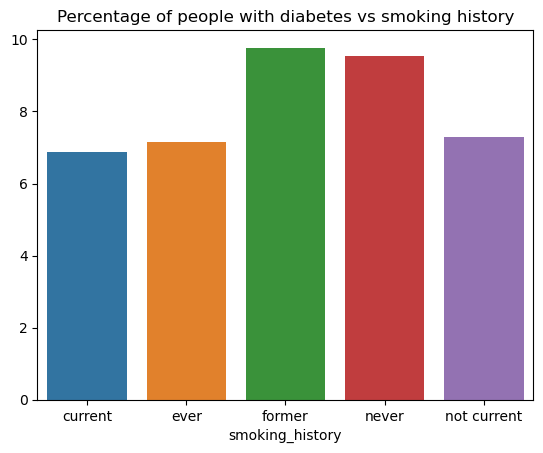

In [34]:
category=df_train.groupby("smoking_history")["diabetes"].mean()*100
sns.barplot(x=category.index, y=category.values)
plt.title(f"Percentage of people with diabetes vs smoking history")
plt.show()

In [35]:
cramers_v_score = cramers_v(df_train["smoking_history"], df_train["diabetes"])
print("smoking_history: ", cramers_v_score)

smoking_history:  0.045945266252978234


### Quick summary
This completes our EDA for the diabetes dataset. The validation team didn't report any errors. If needed, we will come back to this stage to improve our future model.